In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import openpyxl

In [2]:
df = pd.read_csv('./feeds.csv')

In [3]:
df.tail()

,created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status
2393,2022-11-07T15:08:45-03:00,2394,24.9,47.2,62.0,NaN,NaN,NaN,NaN
2394,2022-11-07T15:14:47-03:00,2395,24.9,46.9,51.0,NaN,NaN,NaN,NaN
2395,2022-11-07T15:20:49-03:00,2396,24.8,46.3,67.0,NaN,NaN,NaN,NaN
2396,2022-11-07T15:26:49-03:00,2397,24.9,46.0,65.0,NaN,NaN,NaN,NaN
2397,2022-11-07T15:32:50-03:00,2398,24.5,45.2,65.0,NaN,NaN,NaN,NaN


In [4]:
def corrig(para):
    new_str = ''.join([para[i] for i in range(len(para)) if i <= 18])
    return new_str

In [5]:
df["created_at"] = list(map(corrig,df["created_at"]))
df.head()

,created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status
0,2022-10-26T08:27:51,1,24.1,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-26T08:28:21,2,24.7,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-26T08:28:52,3,24.9,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-26T08:29:22,4,25.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-26T08:29:53,5,25.1,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df["data"] = df["created_at"]
df['data'] = df['data'].astype('string')
df["data"] = df["data"].str[:19]

In [7]:
df["data"] = pd.to_datetime(df["data"])

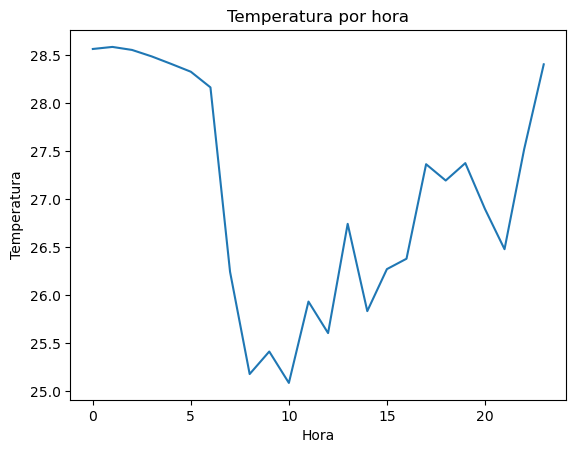

In [8]:
df.groupby(df["data"].dt.hour)["field1"].mean().plot(title="Temperatura por hora")
plt.xlabel("Hora")
plt.ylabel("Temperatura")
plt.savefig("temperatura-hora.png");